# Popular Data Science Questions

---

## 1. Introduction

[Data Science Stack Exchange (DSSE)](https://datascience.stackexchange.com/) is a question and answer website employs a reputation award system, with each post subjected to upvotes and downvotes. 

In this project, we will investigate a dataset of posts in 2019 from DSSE to **understand what people want to learn about in data science**.

---

## 2. Open and Explore the Data

Let's commence by reading and exploring the first few rows of the `2019_questions.csv` dataset.

In [1]:
import pandas as pd

questions = pd.read_csv('2019_questions.csv', parse_dates = ['CreationDate'])
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


Here is a summary of the columns in the dataset:

| Column | Description |
| - | - |
| `Id` | An identification number for the post |
| `CreationDate` | The date and time of creation of the post |
| `Score` | The post's score |
| `ViewCount` | How many times the post was viewed |
| `Tags` | What tags were used |
| `AnswerCount` | How many answers the question got (only applicable to question posts) |
| `FavoriteCount` | How many times the question was favored (only applicable to question posts) |

We can also inspect the number of null values and data type for each column.

In [2]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


- Only the `FavoriteCount` column has missing values. We can replace these by zero values instead, assuming that these posts were not favorited.
- The types for all columns seem adequate, with the exception of `FavoriteCount` which can be `int64` type after replacing the null values.

Let's continue by exploring possible values in the `Tags` column, since this is the only column containing non-numerical data.

In [3]:
questions['Tags'].unique()

array(['<machine-learning><data-mining>',
       '<machine-learning><regression><linear-regression><regularization>',
       '<python><time-series><forecast><forecasting>', ...,
       '<machine-learning><deep-learning><perceptron>',
       '<pca><dimensionality-reduction><linear-algebra>',
       '<keras><weight-initialization>'], dtype=object)

On DSSE, each question can only have a maximum of five tags ([source](https://meta.stackexchange.com/a/18879)). For each question, the `Tags` column contains a list of the tags separated by brackets: `'<machine-learning><regression><linear-regression><regularization>'`.

Instead, we will transform this string in a format which is more suitable for using typical string methods: i.e. `'machine-learning,regression,linear-regression,regularization'`.

---

## 3. Clean the Data

We will now clean the data. Firstly, we will fill in the missing values in `FavoriteCount` with zero values.

In [4]:
questions['FavoriteCount'].fillna(value = 0, inplace = True)
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,0.0
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,0.0
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,0.0
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,0.0
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,0.0


After replacing the null values, we can convert the `FavoriteCount` column to `int64` data type.

In [5]:
questions['FavoriteCount'] = questions['FavoriteCount'].astype('int64')
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


Lastly, we will clean the `Tags` column by replacing the brackets with commas.

In [6]:
questions['Tags'] = questions['Tags'].str.replace('^<|>$', '').str.split('><')
questions.head(5)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


---

## 4. Analyze the Data

We will now determine the most popular tags by considering two different popularity proxies:
- how many times each tag was used and
- how many times each tag was viewed.

Let's compute and visualise both metrics.

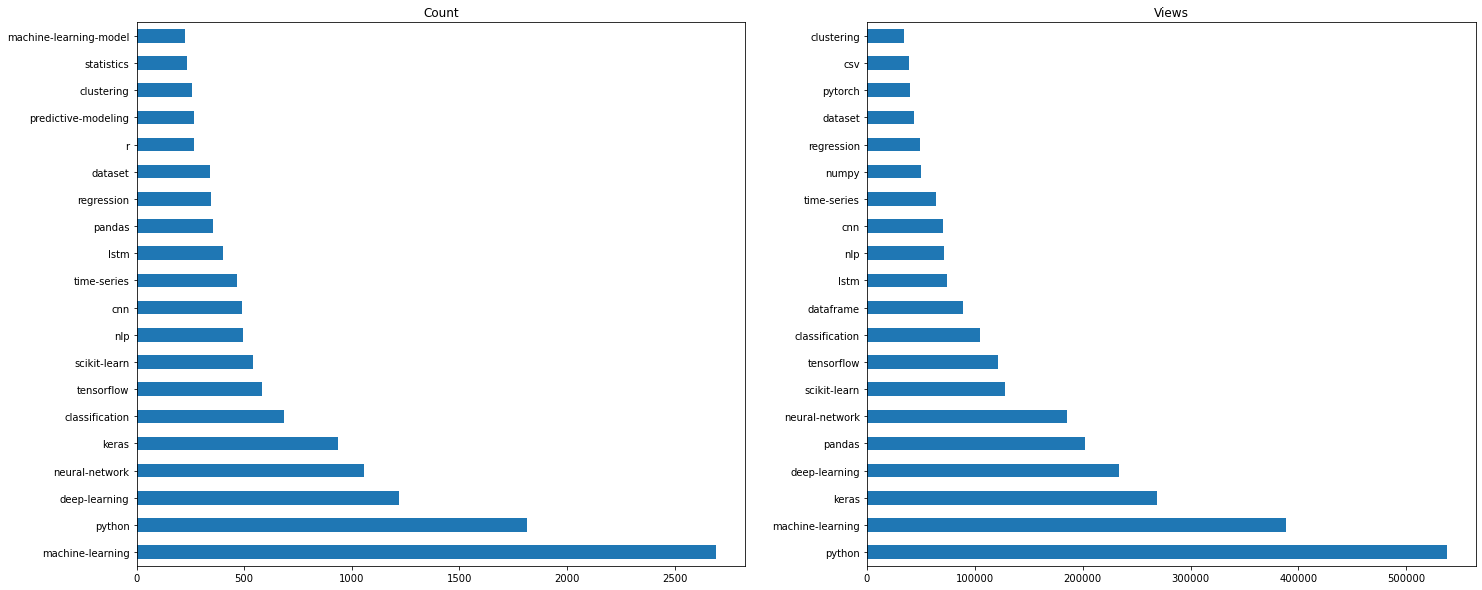

In [7]:
# Count how many times each tag was used
tag_count = dict()

for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
            
# Convert tag_count into in a dataframe
tag_count = pd.DataFrame.from_dict(tag_count, orient = 'index')
tag_count.rename(columns = {0: 'Count'}, inplace = True)

# Sort by count and view top 20 results
tag_count.sort_values(by = 'Count', ascending = False, inplace = True)
most_used = tag_count.head(20)
most_used

import matplotlib.pyplot as plt

# # Plot tag_count
# most_used.plot(kind = 'barh', figsize = (16, 8))
# plt.xlabel('Number of Questions')
# plt.legend('')
# plt.show()

# Count how many times each tag was viewed.
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
# Convert tag_view_count into in a dataframe
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient = 'index')
tag_view_count.rename(columns = {0: 'Views'}, inplace = True)

# Sort by count and view top 20 results
tag_view_count.sort_values(by = 'Views', ascending = False, inplace = True)
most_viewed = tag_view_count.head(20)

# # Plot tag_view_count
# most_viewed.plot(kind = 'barh', figsize = (16, 8))
# plt.xlabel('Number of Views')
# plt.legend('')
# plt.show()

# Visualise the top tags of both counts
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 10))
most_used.plot(kind = 'barh', ax = axes[0], legend = '', subplots = True)
most_viewed.plot(kind = 'barh', ax = axes[1], legend = '', subplots = True)
plt.show()

We see that most of the top tags are present in both dataframes e.g. `python`, `machine-learning`, `deep-learning`.

Some tags also stand out as being related e.g. `python` and `pandas` since pandas is a Python library. Other pairs of tags, shouldn't be related at all, like `pandas` and `r`.

To gauge how pairs of tags are related to each other, we can count how many times each pair appears together.

In [8]:
# Create a list of tags
all_tags = list(tag_count.index)

# Create a dataframe of zero values, with the list of tags as the index and column headers
associations = pd.DataFrame(index = all_tags, columns = all_tags)
associations.fillna(0, inplace = True)

# Count many times each pair of tags was used together
for tags in questions['Tags']:
    associations.loc[tags, tags] += 1

# Focus on most used tags
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index = x.index, columns = x.columns)
    helper_df.loc['time-series', 'r'] = 'background-color: yellow'
    helper_df.loc['r', 'time-series'] = 'background-color: yellow'
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k, k] = 'color: blue'
        
    return helper_df

relations_most_used.style.apply(style_cells, axis = None)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


- The cells highlighted in yellow tell us that `time-series` was used together with `r` 22 times. 
- The values in blue tell us how many times each of the tags was used e.g. 2693 times for `machine-learning`.

To better understand the relations between the most used tags, we will visualise the data in a heatmap instead.

<AxesSubplot:>

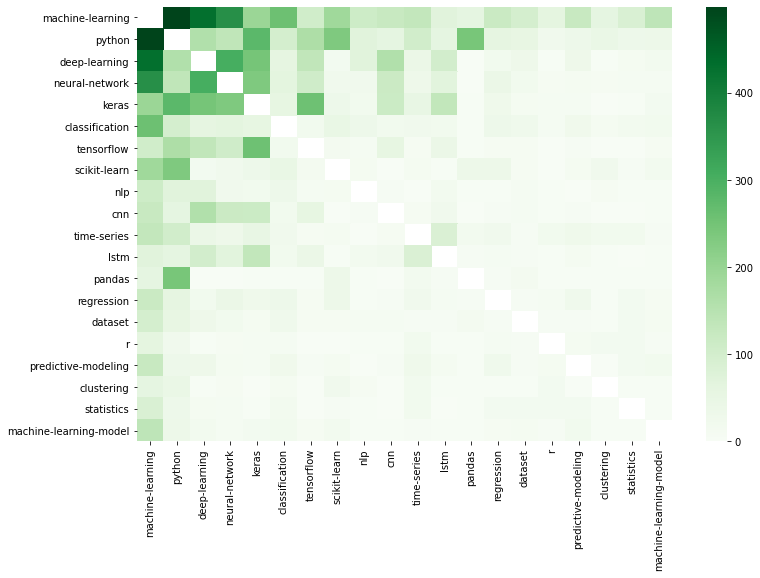

In [9]:
# Remove values in blue
import numpy
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i, i] = numpy.NaN
relations_most_used

# Plot heatmap
import seaborn as sns
plt.figure(figsize = (12, 8))
sns.heatmap(relations_most_used, cmap = 'Greens', annot = False)

- The most used tags also seem to have the strongest relationships, as given by the dark concentration in the top left corner. 
- The most used tags are also the most viewed, here is the list of tags in common: `python`, `machine-learning`, `deep-learning`, `neural-network`, `keras`, `tensorflow`, `classification`, `scikit-learn`.

After further research to pick up domain knowledge on these tags, we learn that:
- `Keras`, `scikit-learn`, `TensorFlow` are all `python` libraries that allow their users to employ `deep-learning` (a type of `neural-network`).
- Most of the top tags are all intimately related with one central `machine-learning` theme: `deep-learning`. 

Hence, we can conclude that the **the most popular data science topic was deep learning**.

---

## 5. Additional Analysis

To further substantiate our findings, we will track the interest in deep learning across time by counting:

- how many deep learning questions are asked per time period
- the total amount of questions per time period
- how many deep learning questions there are relative to the total amount of questions per time period

We will utilise an additional `all_questions.csv` dataset which contains all questions ever asked on DSSE, their dates and tags.

In [10]:
all_questions = pd.read_csv('all_questions.csv', parse_dates = ['CreationDate'])
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


Similarly, we will clean the `Tags` column before analyzing the data.

In [11]:
all_questions['Tags'] = all_questions['Tags'].str.replace('^<|>$', '').str.split('><')
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


We will define deep learning questions as questions which is tagged to any of the following list: `lstm`, `cnn`, `scikit-learn`, `tensorflow`, `keras`, `neural-network`, `deep-learning`. This list was obtained by researching the tags in `most_used` and understanding whether they had any relation to deep learning

Next, let's create a function that assigns 1 to deep learning questions and 0 otherwise.

In [12]:
def deep_learning(tags):
    for tag in tags:
        if tag in ['lstm', 'cnn', 'scikit-learn', 'tensorflow', 
                    'keras', 'neural-network', 'deep-learning']:
            return 1
        return 0

all_questions['DeepLearning'] = all_questions['Tags'].apply(deep_learning)
all_questions.head()

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0


Now, we will track the progression of the data science landscape by quarter.

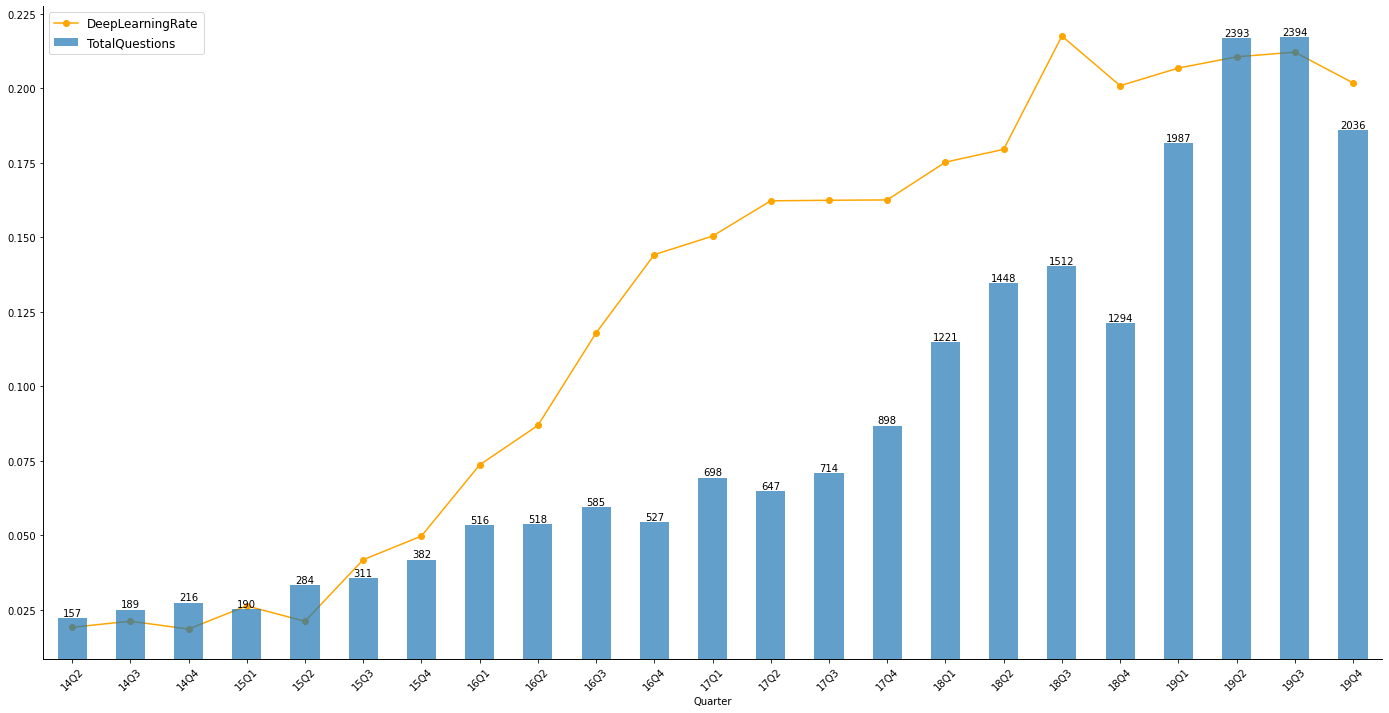

In [13]:
# Remove dates for first quarter of 2020 due to missing data
all_questions = all_questions.loc[all_questions['CreationDate'].dt.year < 2020]

# Create column to identify the quarter in which a question was asked
def quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month - 1) // 3) + 1)
    return '{y}Q{q}'.format(y = year, q = quarter)

all_questions['Quarter'] = all_questions.loc[:, 'CreationDate'].apply(quarter)

# Count how many deep learning questions are asked per time period and the total amount of questions per quarter
quarterly = all_questions.groupby('Quarter').agg({'DeepLearning': ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']

# Compute ratio of deep learning questions to total amount of questions per quarter;
quarterly['DeepLearningRate'] = quarterly['DeepLearningQuestions'] / quarterly['TotalQuestions']
quarterly.reset_index(inplace = True)

# Plot deep learning rate and total questions over time
ax1 = quarterly.plot(x = 'Quarter', y = 'DeepLearningRate',
                    kind = 'line', linestyle = '-', 
                    marker = 'o', color = 'orange', figsize= (24, 12))

ax2 = quarterly.plot(x = 'Quarter', y = 'TotalQuestions',
                     kind = 'bar', ax = ax1, secondary_y = True, 
                     alpha = 0.7, rot = 45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha = 'center', va = 'bottom')
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles = handles1 + handles2, 
           labels = labels1 + labels2, 
           loc = 'upper left', prop = {'size': 12})

for ax in (ax1, ax2):
    for where in ('top', 'right'):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

We observe that **deep learning questions was a high-growth trend since the start of DSSE but it seems to be plateauing**.

---

## 6. Conclusion

In conclusion, we observed that the most popular data science topic was deep learning since the start of DSDE, although this growth trend seems to be slowing down.